# GoNB - A Go Notebook Kernel for Jupyter

See the [tutorial in github](https://github.com/janpfeifer/gonb/blob/e15ac2e8e3fe/examples/tutorial.ipynb). The repository is in [github.com/janpfeifer/gonb](https://github.com/janpfeifer/gonb).


## Installation in Google's Colab

1. Run the installation cell just below once only. It will install Go, GoNB and a couple of Go tools needed to provide auto-complete.

   It takes a couple of minutes ... but only needs to be done once.

   When creating other GoNB notebooks with Google's Colab, you will have to copy the cell below (or do something similar).

2. Restart the session: under `Runtime` menu, click on `Restart Session`

3. After it restarts, if you should be able to change the runtim to **GoNB**. Under the `Runtime` menu, click on the entry `Change Runtime Type`. Don't change the hardware accelerator (otherwise you'll have to restart the installation), but change the runtime type to `Go (gonb)`

4. Restart the session again: under `Runtime` menu, click on `Restart Session`

**Disclaimer**: this is highly not documented or official, but seems to be supported by Colab (it works). This method has broken before without notice. Please reach out to project in [github.com/janpfeifer/gonb](https://github.com/janpfeifer/gonb) if there are any issues.




In [ ]:
#@title Install Go, `goimports` and GoNB code.

# Install Go and goimports.
!echo -n "Installing go ..."
!mkdir -p cache
!wget -q -O cache/go.tar.gz 'https://go.dev/dl/go1.23.1.linux-amd64.tar.gz'
!tar xzf cache/go.tar.gz
%env GOROOT=/content/go
!ln -sf "/content/go/bin/go" /usr/bin/go
!echo " done."
!go version

# Install gonb, goimports, gopls.
!echo -n "Installing gonb ..."
!go install github.com/janpfeifer/gonb@latest >& /tmp/output || cat /tmp/output
!echo " done."
!ln -sf /root/go/bin/gonb /usr/bin/gonb

!echo -n "Installing goimports ..."
!go install golang.org/x/tools/cmd/goimports@latest >& /tmp/output || cat /tmp/output
!echo " done."
!ln -sf /root/go/bin/goimports /usr/bin/goimports

!echo -n "Installing gopls ..."
!go install golang.org/x/tools/gopls@latest >& /tmp/output || cat /tmp/output
!echo " done."
!ln -sf /root/go/bin/gopls /usr/bin/gopls

# Install gonb kernel configuration.
!gonb --install --logtostderr
!echo "Done!"

Installing go ...env: GOROOT=/content/go
 done.
go version go1.23.1 linux/amd64
Installing gonb ... done.
Installing goimports ... done.
Installing gopls ... done.
I0923 20:27:38.817564    7307 install.go:121] [a14e2312] Go (gonb) kernel configuration installed in "/root/.local/share/jupyter/kernels/gonb/kernel.json".
Done!


The cell above shoudl be run only once, and then followed by a change of runtime to `Go (gonb)`. See detailed instructions above.

## Demo

From here below you can delete and put your own code.


First ...

In [ ]:
%%
fmt.Printf("Hello World!")

Hello World!

In [ ]:
import "bytes"
import svgo "github.com/ajstarks/svgo"
import "github.com/janpfeifer/gonb/gonbui"

func Shining(width, height int) string {
    buf := bytes.NewBuffer(nil)
    canvas := svgo.New(buf)
    xp := []int{50, 70, 70, 50, 30, 30}
    yp := []int{40, 50, 75, 85, 75, 50}
    xl := []int{0, 0, 50, 100, 100}
    yl := []int{100, 40, 10, 40, 100}
    bgcolor := "rgb(227,78,25)"
    bkcolor := "rgb(153,29,40)"
    stcolor := "rgb(65,52,44)"
    stwidth := 12
    stylefmt := "stroke:%s;stroke-width:%d;fill:%s"
    canvas.Start(width, height)
    canvas.Def()
    canvas.Gid("unit")
    canvas.Polyline(xl, yl, "fill:none")
    canvas.Polygon(xp, yp)
    canvas.Gend()
    canvas.Gid("runit")
    canvas.TranslateRotate(150, 180, 180)
    canvas.Use(0, 0, "#unit")
    canvas.Gend()
    canvas.Gend()
    canvas.DefEnd()
    canvas.Rect(0, 0, width, height, "fill:"+bgcolor)
    canvas.Gstyle(fmt.Sprintf(stylefmt, stcolor, stwidth, bkcolor))
    for y := 0; y < height; y += 130 {
        for x := -50; x < width; x += 100 {
            canvas.Use(x, y, "#unit")
            canvas.Use(x, y, "#runit")
        }
    }
    canvas.Gend()
    canvas.End()
    return buf.String()
}

%%
gonbui.DisplaySVG(Shining(500, 500))

<?xml version="1.0"?>
<!-- Generated by SVGo -->

lastRenderTime=26.491124


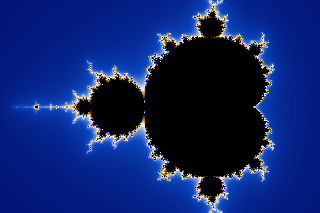

In [ ]:
import "github.com/benc-uk/gofract/pkg/fractals"
import "github.com/benc-uk/gofract/pkg/colors"

%%
imgWidth := 320

// Default fractal
f := fractals.Fractal{
    FractType:    "mandelbrot",
    Center:       fractals.ComplexPair{-0.6, 0.0},
    MagFactor:    1.0,
    MaxIter:      90,
    W:            3.0,
    H:            2.0,
    ImgWidth:     imgWidth,
    JuliaSeed:    fractals.ComplexPair{0.355, 0.355},
    InnerColor:   "#000000",
    FullScreen:   false,
    ColorRepeats: 2,
}
gradient := colors.GradientTable{}
gradient.AddToTable("#000762", 0.0)
gradient.AddToTable("#0B48C3", 0.2)
gradient.AddToTable("#ffffff", 0.4)
gradient.AddToTable("#E3A000", 0.5)
gradient.AddToTable("#000762", 0.9)
imgHeight := int(float64(imgWidth) * float64(f.H/f.W))
img := image.NewRGBA(image.Rect(0, 0, f.ImgWidth, imgHeight))
lastRenderTime := f.Render(img, gradient)
fmt.Printf("lastRenderTime=%v\n", lastRenderTime)
gonbui.DisplayImage(img)

In [ ]:
import "bytes"
import "github.com/janpfeifer/gonb/gonbui"
import mg "github.com/erkkah/margaid"

func mgPlot(width, height int) string {
    randomSeries := mg.NewSeries()
    rand.Seed(time.Now().Unix())
    for i := float64(0); i < 10; i++ {
        randomSeries.Add(mg.MakeValue(i+1, 200*rand.Float64()))
    }

    testSeries := mg.NewSeries()
    multiplier := 2.1
    v := 0.33
    for i := float64(0); i < 10; i++ {
        v *= multiplier
        testSeries.Add(mg.MakeValue(i+1, v))
    }

    diagram := mg.New(width, height,
        mg.WithAutorange(mg.XAxis, testSeries),
        mg.WithAutorange(mg.YAxis, testSeries),
        mg.WithAutorange(mg.Y2Axis, testSeries),
        mg.WithProjection(mg.YAxis, mg.Log),
        mg.WithInset(70),
        mg.WithPadding(2),
        mg.WithColorScheme(90),
        mg.WithBackgroundColor("#f8f8f8"),
    )

    diagram.Line(testSeries, mg.UsingAxes(mg.XAxis, mg.YAxis), mg.UsingMarker("square"), mg.UsingStrokeWidth(1))
    diagram.Smooth(testSeries, mg.UsingAxes(mg.XAxis, mg.Y2Axis), mg.UsingStrokeWidth(3.14))
    diagram.Smooth(randomSeries, mg.UsingAxes(mg.XAxis, mg.YAxis), mg.UsingMarker("filled-circle"))
    diagram.Axis(testSeries, mg.XAxis, diagram.ValueTicker('f', 0, 10), false, "X")
    diagram.Axis(testSeries, mg.YAxis, diagram.ValueTicker('f', 1, 2), true, "Y")

    diagram.Frame()
    diagram.Title("A diagram of sorts 📊 📈")
    buf := bytes.NewBuffer(nil)
    diagram.Render(buf)
    return buf.String()
}

%%
gonbui.DisplaySVG(mgPlot(640, 480))

<path vector-effect="non-scaling-stroke" d="M1.000000e+01,6.800000e+00 C1.888889e+01,6.875434e+00 4.555556e+01,7.018758e+00 6.333333e+01,7.252602e+00 C8.111111e+01,7.486446e+00 9.888889e+01,7.711993e+00 1.166667e+02,8.203066e+00 C1.344444e+02,8.694139e+00 1.522222e+02,9.167786e+00 1.700000e+02,1.019904e+01 C1.877778e+02,1.123029e+01 2.055556e+02,1.222495e+01 2.233333e+02,1.439059e+01 C2.411111e+02,1.655622e+01 2.588889e+02,1.864500e+01 2.766667e+02,2.319283e+01 C2.944444e+02,2.774066e+01 3.122222e+02,3.212711e+01 3.300000e+02,4.167755e+01 C3.477778e+02,5.122798e+01 3.655556e+02,6.043953e+01 3.833333e+02,8.049545e+01 C4.011111e+02,1.005514e+02 4.188889e+02,1.198956e+02 4.366667e+02,1.620130e+02 C4.544444e+02,2.041305e+02 4.811111e+02,3.046688e+02 4.900000e+02,3.332000e+02 "/> <path d="M1.000000e+01,2.329006e+02 C1.888889e+01,2.390237e+02 4.555556e+01,2.843420e+02 6.333333e+01,2.696389e+02 C8.111111e+01,2.549359e+02 9.888889e+01,1.481093e+02 1.166667e+02,1.446824e+02 C1.344444e+02,1.412554e+02 1.522222e+02,2.284172e+02 1.700000e+02,2.490771e+02 C1.877778e+02,2.697370e+02 2.055556e+02,2.808423e+02 2.233333e+02,2.686418e+02 C2.411111e+02,2.564414e+02 2.588889e+02,1.768725e+02 2.766667e+02,1.758745e+02 C2.944444e+02,1.748764e+02 3.122222e+02,2.499871e+02 3.300000e+02,2.626535e+02 C3.477778e+02,2.753199e+02 3.655556e+02,2.490031e+02 3.833333e+02,2.518729e+02 C4.011111e+02,2.547427e+02 4.188889e+02,2.907331e+02 4.366667e+02,2.798722e+02 C4.544444e+02,2.690113e+02 4.811111e+02,2.022350e+02 4.900000e+02,1.867076e+02 " vector-effect="non-scaling-stroke"/> 1 2 3 4 5 6 7 8 9 10 X 1.0 2.0 4.0 8.0 16.0 32.0 64.0 128.0 256.0 512.0 Y A diagram of sorts 📊 📈

In [ ]:
import (
	"math/rand"
	"github.com/go-echarts/go-echarts/v2/charts"
	"github.com/go-echarts/go-echarts/v2/opts"
	"github.com/go-echarts/go-echarts/v2/types"
    gonb_echarts "github.com/janpfeifer/gonb-echarts"
    "github.com/janpfeifer/must"
)

func toLineData[In any](data []In) []opts.LineData {
    r := make([]opts.LineData, len(data))
    for ii, v := range data {
        r[ii].Value = v
    }
    return r
}

%%
stackedLine := charts.NewLine()
stackedLine.SetGlobalOptions(
    charts.WithTitleOpts(opts.Title{Title: "Stacked Line",}),
    charts.WithTooltipOpts(opts.Tooltip{Show: opts.Bool(true), Trigger: "axis"}),
)
seriesOpt := charts.WithLineChartOpts(opts.LineChart{
    Stack: "Total",
    ShowSymbol: opts.Bool(true),
})

stackedLine.
    SetGlobalOptions(charts.WithYAxisOpts(opts.YAxis{Type: "value"}))
stackedLine.
    SetXAxis([]string{"Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"}).
    AddSeries("Email", toLineData([]int{120, 132, 101, 134, 90, 230, 210}), seriesOpt).
    AddSeries("Union Ads", toLineData([]int{220, 182, 191, 234, 290, 330, 310}), seriesOpt).
    AddSeries("Video Ads", toLineData([]int{150, 232, 201, 154, 190, 330, 410}), seriesOpt).
    AddSeries("Direct", toLineData([]int{320, 332, 301, 334, 390, 330, 320}), seriesOpt).
    AddSeries("Search Engine", toLineData([]int{820, 932, 901, 934, 1290, 1330, 1320}), seriesOpt)

must.M(gonb_echarts.Display(stackedLine, "width: 1024px; height:400px; background: white;"))

# More ... and Help

In [ ]:
%help

## GoNB Help Page

**GoNB** is a Go kernel that compiles and executes on-the-fly Go code.

When executing a cell, **GoNB** will save the cell contents (except non-Go commands see
below) into a `main.go` file, compile and execute it.

It also saves any global declarations (imports, functions, types, variables, constants)
and reuse them at the next cell execution -- so you can define a function in one
cell, and reuse in the next one. Just the `func main()` is not reused.

A `hello world` example would look like:

```go
func main() {
    fmt.Printf(`Hello world!\n`);
}

```

But to avoid having to type `func main()` all the time, you can use `%%` and everything
after is wrapped inside a `func main() { ... }`. 
So our revised `hello world` looks like:

```go
%%
fmt.Printf(`Hello world!\n`)

```


### Init Functions -- `func init()`

Since there is always only one definition per function name, it's not possible for
each cell to have its own init() function. 
Instead, **GoNB** converts any function named `init_something()` to `init()` before 
compiling and executing. 
This way each cell can create its own `init_...()` and have it called at every cell execution.


### Special non-Go Commands

- `%% [<args...>]` or `%main [<args...>]`: Marks the lines as follows to be wrapped in a `func main() {...}` during
  execution. A shortcut to quickly execute code. It also automatically includes `flag.Parse()`
  as the very first statement. Anything after`%%` or `%main` are taken as arguments
  to be passed to the program -- it resets previous values given by `%args`.
- `%args <args...>`: Sets arguments to be passed when executing the Go code. This allows one to
  use flags as a normal program. Notice that if a value after `%%` or `%main` is given, it will
  overwrite the values here.
- `%exec <my_func> [<args...>]`: this will call the function `my_func()`, and optionally set the program arguments.
  Behind the scenes it creates a trivial `func main()` that parses the flags and calls `my_func()` (without any
  parameters or return values).
- `%autoget` and `%noautoget`: Default is `%autoget`, which automatically does `go get` for
  packages not yet available.
- `%cd [<directory>]`: Change current directory of the Go kernel, and the directory from where
  the cells are executed. If no directory is given it reports the current directory.
- `%env VAR value`: Sets the environment variable VAR to the given value. These variables
  will be available both for Go code and for shell scripts.
- `%goflags <values...>`: Configures list of extra arguments to pass to `go build` when compiling the
  code for execution of a cell.
  If no values are given, it simply shows the current setting.
  To reset its value, use `%goflags """`.
  See example on how to use this in the [tutorial](https://github.com/janpfeifer/gonb/blob/main/examples/tutorial.ipynb). 
- `%with_inputs`: will prompt for inputs for the next shell command. Use this if
  the next shell command (`!`) you execute reads the stdin. Jupyter will require
  you to enter one last value after the shell script executes.
- `%with_password`: will prompt for a password passed to the next shell command.
  Do this is if your next shell command requires a password.

**Notes**: 

1. The special commands below can be used in the start of the line as is, or prefixed by a `//gonb:`, which may be easier
on some IDEs if editing the code externally (since these special commands are not proper Go). 
So `//gonb:%%` is the same as `%%` 
2. All these commands are executed **before** any Go code in the same cell.


### Managing Memorized Definitions

- `%list` (or `%ls`): Lists all memorized definitions (imports, constants, types, variables and
  functions) that are carried from one cell to another.
- `%remove <definitions>` (or `%rm <definitions>`): Removes (forgets) given definition(s). Use as key the
  value(s) listed with `%ls`.
- `%reset [go.mod]` clears all memorized definitions (imports, constants, types, functions, etc.)
  as well as re-initializes the `go.mod` file. 
  If the optional `go.mod` parameter is given, it will re-initialize only the `go.mod` file -- 
  useful when testing different set up of versions of libraries.


### Executing Shell Commands

- `!<shell_cmd>`: executes the given command on a new shell. It makes it easy to run
  commands on the kernels box, for instance to install requirements, or quickly
  check contents of directories or files. Lines ending in `\` are continued on
  the next line -- so multi-line commands can be entered. But each command is
  executed in its own shell, that is, variables and state is not carried over.
- `!*<shell_cmd>`: same as `!<shell_cmd>` except it first changes directory to
  the temporary directory used to compile the go code -- the latest execution
  is always saved in the file `main.go`. It's also where the `go.mod` file for
  the notebook is created and maintained. Useful for manipulating `go.mod`,
  for instance to get a package from some specific version, something
  like `!*go get github.com/my/package@v3`.

Notice that when the cell is executed, first all shell commands are executed, and only after that, if there is
any Go code in the cell, it is executed.

### Running a Debugger

While **GoNB** doesn't (yet) talk the debug protocol with JupyterLab, it's easy to start a GUI debugger
from a cell, if being executed on the same machine as the browser.

The common Go debugger recommendation is [delve](https://github.com/go-delve/delve), and in particular its front-end
[gdlv](https://github.com/aarzilli/gdlv). And to make it simpler **GoNB** includes a small wrapper script 
[`ndlv`](https://github.com/janpfeifer/gonb/blob/main/cmd/ndlv/ndlv) to
set the directory and program name to the last cell executed. Copy or link that script somewhere in your `PATH`
(maybe `${HOME}/bin` if you have such directory set up).

To open the debugger, after executing a cell you want to debug, you create and execute a new cell with this single shell command:

```
!ndlv
```

### Tracking of Go Files In Development:

A convenient way to develop programs or libraries in **GoNB** is to use replace
rules in **GoNB**'s `go.mod` to your program or library being developed and test
your program from **GoNB** -- see the 
[Tutorial]((https://github.com/janpfeifer/gonb/blob/main/examples/tutorial.ipynb))'s
section "Developing Go libraries with a notebook" for different ways of achieving this.

To manipulate the list of files tracked for changes:

- `%track [file_or_directory]`: add file or directory to list of tracked files,
  which are monitored by **GoNB** (and 'gopls') for auto-complete or contextual help.
  If no file is given, it lists the currently tracked files.
- `%untrack [file_or_directory][...]`: remove file or directory from list of tracked files.
  If suffixed with `...` it will remove all files prefixed with the string given (without the
  `...`). If no file is given, it lists the currently tracked files.


### Environment Variables

For convenience, **GoNB** defines the following environment variables -- available for the shell
scripts (`!` and `!*`) and for the Go cells:

- `GONB_DIR`: the directory where commands are executed from. This can be changed with `%cd`.
- `GONB_TMP_DIR`: the directory where the temporary Go code, with the cell code, is stored
  and compiled. This is the directory where `!*` scripts are executed. It only changes when a kernel
  is restarted, and a new temporary directory is created.
- `GONB_PIPE`: is the _named pipe_ directory used to communicate rich content (HTML, images)
  to the kernel. Only available for _Go_ cells, and a new one is created at every execution.
  This is used by the `**GoNB**ui`` functions described above, and doesn't need to be accessed directly.

### Widgets

The package `gonbui/widgets` offers widgets that can be used to interact in a more
dynamic way, using the HTML element in the browser. E.g.: buttons, sliders.

It's not necessary to do anything, but, to help debug the communication system
with the front-end, **GoNB** offers a couple of special commands:

- `%widgets` - install the javascript needed to communicate with the frontend.
  This is usually not needed, since it happens automatically when using Widgets.
- `%widgets_hb` - send a _heartbeat_ signal to the front-end and wait for the
  reply.
  Used for debugging only.

### Writing for WASM (WebAssembly) (Experimental)

**GoNB** can also compile to WASM and run in the notebook. This is experimental, and likely to change
(feedback is very welcome), and can be used to write interactive widgets in Go, in the notebook.

When a cell with `%wasm` is executed, a temporary directory is created under the Jupyter root directory
called `jupyter_files/<kernel unique id>/` and the cell is compiled to a wasm file and put in that 
directory.

Then **GONB** outputs the javascript needed to run the compiled wam.

In the Go code, the following extra constants/variables are created in the global namespace, and can be used
in your Go code:

- `GonbWasmDir`, `GonbWasmUrl`: the directory and url (served by Jupyter) where the generated `.wasm` files are read.
  Potentially, the user can use it to serve other files.
  These are unique for the kernel, but shared among cells.
- `GonbWasmDivId`: When a `%wasm` cell is executed, an empty `<div id="<unique_id>"></div>`
  is created with a unique id -- every cell will have a different one.
  This is where the Wasm code can dynamically create content.

The following environment variables are set when `%wasm` is created:

- `GONB_WASM_SUBDIR`, `GONB_WASM_URL`: the directory and url (served by Jupyter) where the generated `.wasm` files are read.
  Potentially, the user can use it to serve other files.
  These environment variables are available for shell scripts (`!...` and `!*...` special commands) and non-wasm 
  programs if they want to serve different files from there.


### Writing Tests and Benchmarks

If a cell includes the `%test` command (anywhere in cell), it is compiled with `go test`
(as opposed to `go build`).
This can be very useful both to demonstrate tests, or simply help develop/debug them in a notebook.

If `%test` is given without any flags, it uses by default the flags `-test.v` (verbose) and `-test.run` defined
with the list of the tests defined in the current cell. 
That is, it will run only the tests in the current cell. 
Also, if there are any benchmarks in the current cell, it appends the flag `-test.bench=.` and runs the benchmarks
defined in the current cell.

Alternatively one can use `%test <flags>`, and the `flags` are passed to the binary compiled with `go test`. 
Remember that test flags require to be prefixed with `test.`. 
So for a verbose output, use `%test -test.v`. 
For benchmarks, run `%test -test.bench=. -test.run=Benchmark`. 

See examples in the [`gotest.ipynb` notebook here](https://github.com/janpfeifer/gonb/blob/main/examples/tests/gotest.ipynb).


### Cell Magic

The following are special commands that change how the cell is interpreted, so they are prefixed with `%%` (two '%'
symbols). They try to follow [IPython's Cell Magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cell-magics).

They must always appear as the first line of the cell.

The contents in the cells are not assumed to be Go, so auto-complete and contextual help are disabled in those cells.

#### `%%writefile`

```
%%writefile [-a] <filePath>
```

Write contents of the cell (except the first line with the '%%writefile') to the given `<filePath>`. If `-a` is given
it will append the cell contents to the file.

This can be handy if for instance the notebook needs to write a configuration file, or simply to dump the code inside
the cell into some file.

File path passes through a tilde (`~`) expansion to the user's home directory, as well as environment variable substitution (e.g.: `${HOME}` or `$MY_DIR/a/b`). 

### `%%script`, `%%bash` and `%%sh`

```
%%script <command>
```

Execute `<command>` and feed it (`STDIN`) with the contents of the cell. The `%%bash` and `%%sh` magic is an alias to `%%script bash` and `%%script sh` respectively.

Generally, a convenient way to run larger scripts.


### Other

- `%goworkfix`: work around 'go get' inability to handle 'go.work' files. If you are
  using 'go.work' file to point to locally modified modules, consider using this. It creates
  'go mod edit --replace' rules to point to the modules pointed to the 'use' rules in 'go.work'
  file.
  It overwrites/updates 'replace' rules for those modules, if they already exist. See 
  [tutorial](https://github.com/janpfeifer/gonb/blob/main/examples/tutorial.ipynb) for an example.

### Links

- [github.com/janpfeifer/gonb](https://github.com/janpfeifer/gonb) - GitHub page.
- [Tutorial](https://github.com/janpfeifer/gonb/blob/main/examples/tutorial.ipynb).
- [go.dev](https://pkg.go.dev/github.com/janpfeifer/gonb) package reference.